# Programação Genética - Atividade Prática 4
## Leonardo Augusto Ferreira
### leauferreira@cpdee.ufmg.br

## Aluno: Yan Victor Gomes Ferreira
## Matrícula: 2021014155
## E-mail: eng-yanvictor@ufmg.br

In [1]:
# documentation:
# https://docs.sympy.org/latest/install.html
# https://gplearn.readthedocs.io/en/stable/index.html
# https://github.com/heal-research/pyoperon

In [2]:
# Bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import make_blobs, make_moons
from sklearn.metrics import mean_squared_error
from gplearn.genetic import SymbolicRegressor
from gplearn.genetic import SymbolicClassifier
from gplearn.functions import make_function
import sympy as sp

---

### Motivação:

\begin{equation}
f(\mathbf{x}) = x_0^2 - x_1^2 + x_1 -1
\end{equation}

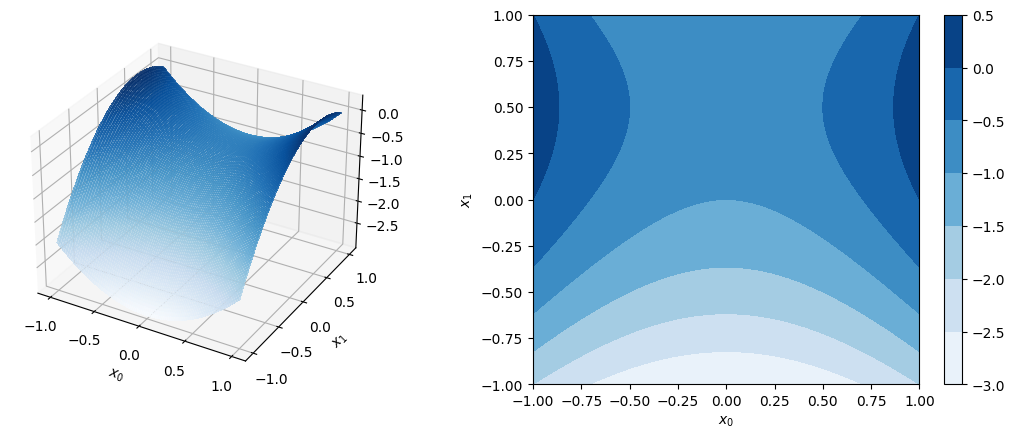

In [3]:
# Definição do grid e da função que se deseja aproximar
x_0 = np.linspace(-1, 1, 100)
x_1 = np.linspace(-1, 1, 100)
f = lambda x_0, x_1 : x_0**2 - x_1**2 + x_1 - 1
# f = lambda x_0, x_1 : np.sin(np.sqrt(x_0**2 + x_1**2))
X_0, X_1 = np.meshgrid(x_0, x_1)
F = f(X_0, X_1)

fig = plt.figure(figsize=plt.figaspect(.35))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot_surface(X_0, X_1, F, rstride=1, cstride=1, cmap=cm.Blues, linewidth=0, antialiased=False, alpha=0.75)
cont = ax2.contourf(X_0, X_1, F, cmap=cm.Blues, origin='lower')
fig.colorbar(cont)
ax1.set_xlabel('$x_0$')
ax1.set_ylabel('$x_1$')
ax2.set_xlabel('$x_0$')
ax2.set_ylabel('$x_1$')
plt.show()

#### GPLEARN

In [4]:
# Geração dos dados para treinamento do algoritmo
#
# Nota-se: a função SymbolicRegressor() espera que x seja uma matriz, então, mesmo que seja um problema
# univariado, passa-se uma matriz coluna (x.reshape((-1,1))). y não precisa ser matriz, pode ser vetor.
X_mot = np.random.uniform(-1, 1, 100).reshape(50, 2)
y_mot = f(X_mot[:, 0], X_mot[:, 1])

# Dicionário para "tradução" das funções simbólicas pelo sympy
locals = {
    'add': lambda x,y: x+y,
    'sub': lambda x,y: x-y,
    'mul': lambda x,y: x*y,
    'sin': lambda x  : sp.sin(x),
    'cos': lambda x  : sp.cos(x),
    'pow': lambda x, y: x**y,
}

# Operadores selecionados
selectedOperators = [locals[key] for key in ['add', 'sub', 'mul', 'sin', 'cos']]

# Definição dos hiperparâmetros do modelo
#
# As funções escolhidas para o function_set são escolhidas a partir da "aparência" da distribuição dos dados
gplearn_model = SymbolicRegressor(population_size=5000,
                                  generations=50,
                                  function_set=['add', 'sub', 'mul', 'sin', 'cos'], 
                                  stopping_criteria=0.01,
                                  p_crossover=0.7, 
                                  p_subtree_mutation=0.1,
                                  p_hoist_mutation=0.05, 
                                  p_point_mutation=0.1,
                                  max_samples=0.9, 
                                  verbose=1,
                                  parsimony_coefficient=0.01,
                                  random_state=0)

# É basicamente um problema de aprendizado supervisionado, então passa-se uma grade de pontos e a saída esperada.
gplearn_model.fit(X_mot, y_mot)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    16.95          1.51722        5         0.285267         0.147098      2.86m
   1    11.68         0.975774        7         0.241903         0.374737      2.79m
   2     8.20         0.845729        8          0.20709         0.365562      2.80m
   3     5.21         0.815462        9         0.135522         0.146104      2.54m
   4     4.12         0.856505        9         0.132277         0.175316      2.54m
   5     4.70         0.914126        9         0.127757         0.215995      2.31m
   6     6.28         0.850504       12         0.113936         0.172387      2.48m
   7     8.16         0.761264       14        0.0908284        0.0763533      2.45m
   8     8.69          0.74451       15        0.0766817         0.092377  

SymbolicRegressor(function_set=['add', 'sub', 'mul', 'sin', 'cos'],
                  generations=50, max_samples=0.9, p_crossover=0.7,
                  p_hoist_mutation=0.05, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, parsimony_coefficient=0.01,
                  population_size=5000, random_state=0, stopping_criteria=0.01,
                  verbose=1)

mse: 8.516487005789111e-06


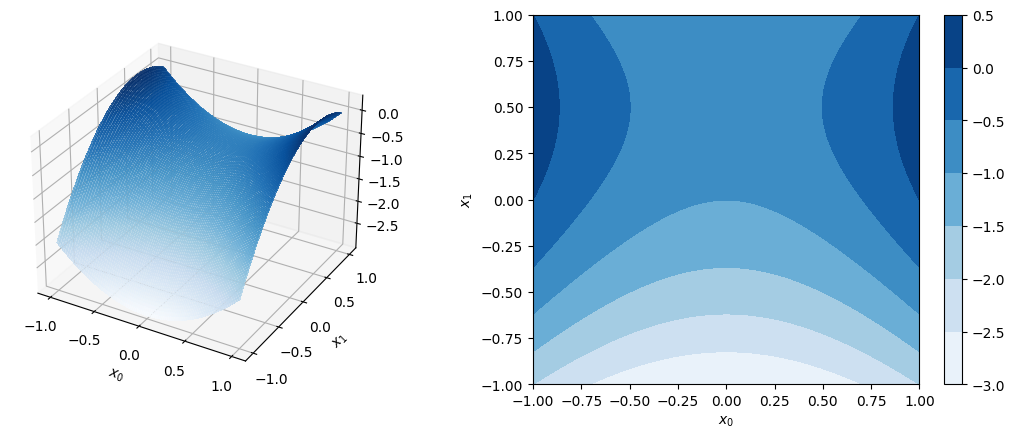

In [5]:
# Grid de teste
data = np.column_stack((X_0.ravel(), X_1.ravel()))

# Obtenção da previsão do modelo pros dados de teste
predict = gplearn_model.predict(data)

# Adequação da previsão para o formato das entradas
gp_Z = predict.reshape(X_0.shape)

fig = plt.figure(figsize=plt.figaspect(.35))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot_surface(X_0, X_1, gp_Z, rstride=1, cstride=1, cmap=cm.Blues, linewidth=0, antialiased=False, alpha=0.75)
cont = ax2.contourf(X_0, X_1, gp_Z, cmap=cm.Blues, origin='lower')
fig.colorbar(cont)
ax1.set_xlabel('$x_0$')
ax1.set_ylabel('$x_1$')
ax2.set_xlabel('$x_0$')
ax2.set_ylabel('$x_1$')

print(f'mse: {mean_squared_error(gp_Z, F)}')

#### Sympy

In [6]:
locals = {
    'add': lambda x,y: x+y,
    'sub': lambda x,y: x-y,
    'mul': lambda x,y: x*y,
    'sin': lambda x  : sp.sin(x),
    'cos': lambda x  : sp.cos(x),
    'pow': lambda x, y: x**y,
}

# Obtém expressão retornada pelo PG
bestExpr = str(gplearn_model._program)

# Transforma saída do PG em expressão simbólica
symbolicBestExpression = sp.simplify(sp.sympify(str(bestExpr), locals=locals))
symbolicBestExpression


X0**2 - X1**2 + X1 - 0.997113389823056

In [7]:
symbolicBestExpression.subs({'X0': 2, 'X1': 1}).evalf()

3.00288661017694

In [8]:
df_d_x1 = sp.diff(symbolicBestExpression, 'X0') 
df_d_x1

2*X0

In [9]:
df_d_x2 = sp.diff(symbolicBestExpression, 'X1') 
df_d_x2

1 - 2*X1

In [10]:
lamb_df = sp.lambdify('X1', df_d_x2, 'numpy')

lamb_df(np.arange(5))

array([ 1, -1, -3, -5, -7])

---

### Descrição do problema 1

O gráfico a seguir apresenta a variação da concentração de um hormônio $h$ em 1 (um) dia. A partir do momento em que um estímulo $s_1$ acontece em $t_0$ foi avaliada a concentração de $h$ em um grupo de teste e o resultado apresentado no gráfico é a média do grupo analisado. 

In [11]:
data = pd.read_csv('concentration.csv')
x = data['tempo(horas)'].values
y = data['concentração(und/ml)'].values
data.head()

,tempo(horas),concentração(und/ml)
0,5.655912,0.865342
1,21.653106,0.023354
2,4.075351,0.897590
3,10.349699,0.307491
4,7.140681,0.563640


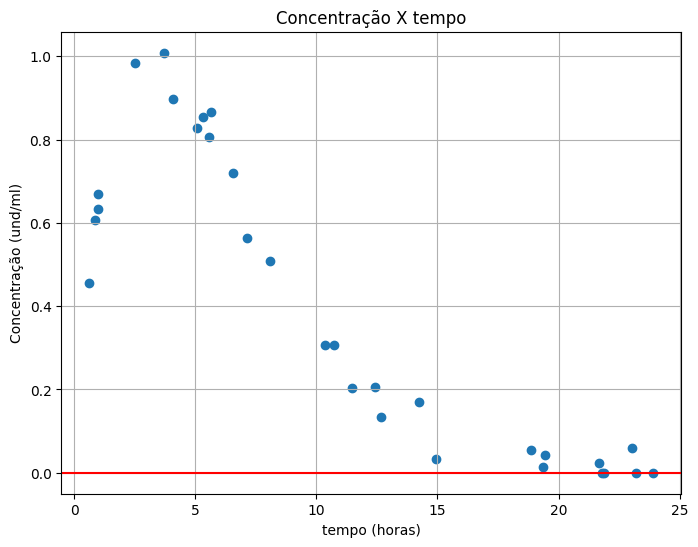

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Concentração X tempo")
plt.xlabel("tempo (horas)")
plt.grid()
plt.ylabel("Concentração (und/ml)")
plt.show()

### Questões e resoluções do problema 1

O objetivo desse problema é utilizar a programação genética para solucionar as seguintes tarefas:
- a) Determine uma expressão matemática que aproxima os dados disponibilizados no problema.

In [13]:
# Adequação do shape dos dados (x precisa ser 2D, y precisa ser 1D)
x = x.reshape((-1,1))
y = y.ravel()

# Funções complementares
def exp(x1):
    with np.errstate(over='ignore'):
        return np.where(np.abs(x1) < 100, np.exp(x1), 0.)
exp = make_function(function=exp, name='exp', arity=1)

# Adiciona funções complementares à lista de funções
selectedOperators = ['add', 'sub', 'mul', 'sin', 'cos', exp]

modelQ1 = SymbolicRegressor(population_size=5000,
                                  generations=50,
                                  function_set=selectedOperators, 
                                  stopping_criteria=0.05,
                                  p_crossover=0.7, 
                                  p_subtree_mutation=0.1,
                                  p_hoist_mutation=0.05, 
                                  p_point_mutation=0.1,
                                  max_samples=0.9, 
                                  verbose=1,
                                  parsimony_coefficient=0.01,
                                  random_state=0)
modelQ1.fit(x, y)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    16.04      1.23417e+46        7         0.158695         0.166727      3.33m
   1     6.27      1.46252e+38        8         0.143072         0.247621      2.92m
   2     4.63      4.42867e+37       10         0.113084         0.127667      2.80m
   3     5.62      2.14246e+38       10          0.10179         0.229317      2.54m
   4     5.15      3.58035e+37       10        0.0486579        0.0961085      2.48m


SymbolicRegressor(function_set=['add', 'sub', 'mul', 'sin', 'cos',
                                <gplearn.functions._Function object at 0x7fa39de6e670>],
                  generations=50, max_samples=0.9, p_crossover=0.7,
                  p_hoist_mutation=0.05, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, parsimony_coefficient=0.01,
                  population_size=5000, random_state=0, stopping_criteria=0.05,
                  verbose=1)

In [14]:
# Obtém expressão retornada pelo PG
bestExprQ1 = str(modelQ1._program)

# Dicionário para "traduzir" as operações do gplearn para o sympy
locals = {
    'add': lambda x,y: x+y,
    'sub': lambda x,y: x-y,
    'mul': lambda x,y: x*y,
    'sin': lambda x  : sp.sin(x),
    'cos': lambda x  : sp.cos(x),
    'pow': lambda x, y: x**y,
}


# Transforma saída do PG em expressão simbólica
symbolicBestExpressionQ1 = sp.simplify(sp.sympify(bestExprQ1, locals=locals))
symbolicBestExpressionQ1

sin(exp(-0.149*X0 + cos(0.149*X0)))

Vou plotar o gráfico da função aproximada pelo algoritmo para avaliar visualmente a qualidade da aproximação:

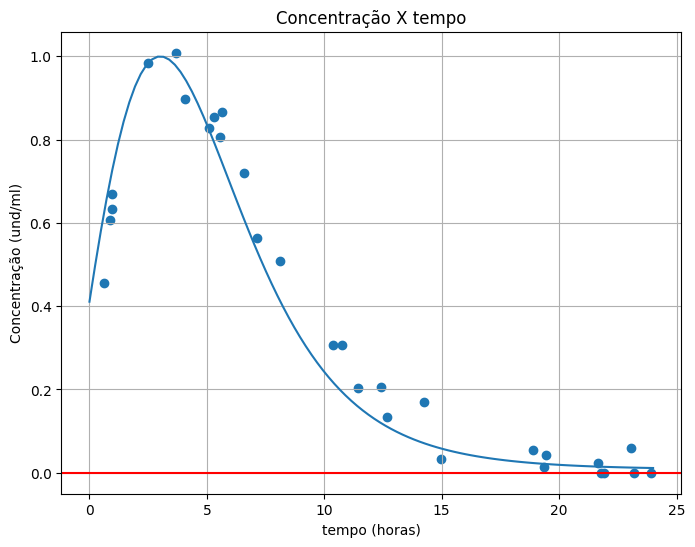

In [15]:
# Obtenção da previsão do modelo pros dados de teste
xTest = np.linspace(0, 24, 100).reshape((-1,1))
predictQ1 = modelQ1.predict(xTest)

# Comparação da expressão retornada pelo modelo com as saídas esperadas
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.plot(xTest, predictQ1)
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Concentração X tempo")
plt.xlabel("tempo (horas)")
plt.grid()
plt.ylabel("Concentração (und/ml)")
plt.show()

- b) Qual é o tempo $t_{max}$ necessário para que a concentração de hormônio h atinja o seu valor máximo? Por favor, descreva o seu raciocínio para solucionar essa tarefa. 

Para encontrar o ponto máximo da função, preciso operar sobre a sua forma simbólica. Derivando a expressão e igualando o resultado a zero, é possível encontrar o valor da abscissa que gera o valor máximo nas ordenadas por meio de métodos numéricos (estimação das raízes da derivada). Vou estimar as raízes utilizando a função nsolve() do sympy.

In [16]:
# Cria símbolo sympy pra entrada do modelo
x_0 = sp.symbols('X0')

# Derivada da expressão encontrada
dBestExprQ1 = sp.diff(symbolicBestExpressionQ1, x_0) 

# Estimação da raiz da derivada
initialGuess = 4
tmax = sp.nsolve(dBestExprQ1, x_0, initialGuess)
print(f'A concentração de hormônio h atinge seu valor máximo em t = {round(tmax,3)}')


A concentração de hormônio h atinge seu valor máximo em t = 3.015


Avaliação do resultado no plot da expressão:

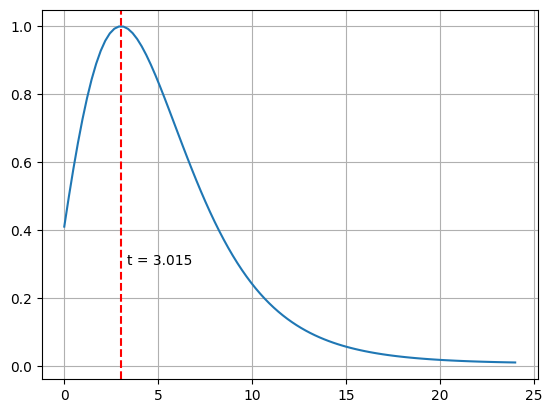

In [17]:
plt.plot(xTest, predictQ1)
plt.axvline(tmax, color='red', linestyle='--')
plt.annotate(f't = {round(tmax,3)}', xy=(tmax+0.3, 0.3))
plt.grid()
plt.show()

- c) Suponha que, em um segundo experimento, um estímulo $s_2$ ocorra quando a concentração de hormônio $h$ diminuir 70% do valor máximo. Determine qual o tempo $t_{s_2}$ em que o estímulo $s_2$ ocorrerá e gere um novo gráfico que apresente o comportamento da concentração de hormônio h no segundo experimento.

Inicialmente, vou determinar o valor máximo da concentração para saber qual será o valor em que o estímulo deve ocorrer no segundo experimento.

In [18]:
# Determinando para qual valor da função deve ocorrer o novo estímulo
funcBestExprQ1 = sp.lambdify(x_0, symbolicBestExpressionQ1, 'numpy')
bestExprQ1Max = symbolicBestExpressionQ1.subs(x_0, tmax).evalf()
newStimulusValue = 0.3*bestExprQ1Max
print(f'O novo estímulo deve ocorrer quando a concentração atingir o valor: {round(newStimulusValue,3)}')

O novo estímulo deve ocorrer quando a concentração atingir o valor: 0.300


Determinado o valor em que deve ocorrer o novo estímulo, preciso igualar a expressão a esse valor para saber qual o tempo $t_{s_2}$ para o qual a equação é verdadeira. Ou seja, quero $t_{s_2}$ tal que $bestExprQ1(t_{s_2}) = newStimulusValue$, o que é o mesmo que achar a raiz da equação $bestExprQ1(t) - newStimulusValue = 0$.

Para isso, vou utilizar a mesma ideia da letra (b).

In [19]:
# Criando nova expressão para da qual eu quero encontrar as raízes
newStimulusSymbExpr = symbolicBestExpressionQ1 - newStimulusValue

# Estimação da raiz da expressão
initialGuess = 4
ts2 = sp.nsolve(newStimulusSymbExpr, x_0, initialGuess)
print(f'A concentração de hormônio h diminui 70% do seu valor máximo em t = {round(ts2,3)}')

A concentração de hormônio h diminui 70% do seu valor máximo em t = 9.255


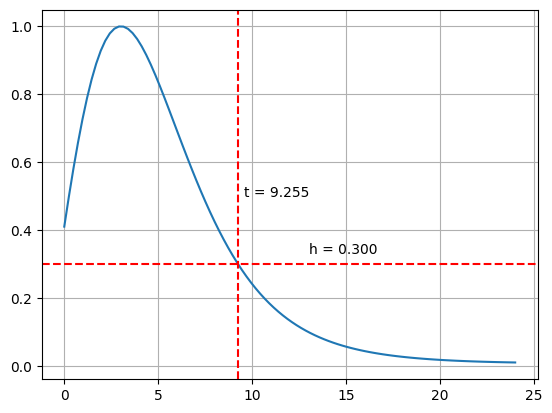

In [20]:
plt.plot(xTest, predictQ1)
plt.axvline(ts2, color='red', linestyle='--')
plt.axhline(newStimulusValue, color='red', linestyle='--')
plt.annotate(f't = {round(ts2,3)}', xy=(ts2+0.3, 0.5))
plt.annotate(f'h = {round(newStimulusValue,3)}', xy=(13, newStimulusValue+0.03))
plt.grid()
plt.show()

Agora, sendo conhecido o tempo no qual ocorre o novo estímulo, vou gerar o gráfico que ilustra o comportamento da função no segundo experimento. Vou definir essa nova função por partes, sendo (1) igual à função do primeiro experimento para t < $t_{s_2}$ e (2) igual à soma da função original com ela mesma deslocada $t_{s_2}$ unidades para t >= $t_{s_2}$, posto que o impulso, no primeiro experimento, ocorre no tempo 0.

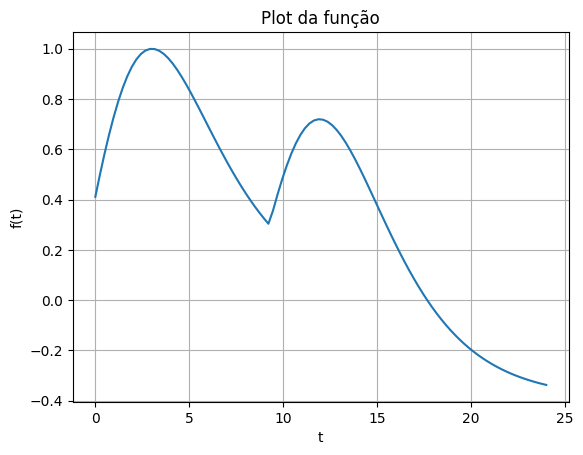

In [21]:
# Definindo a expressão 'expr'
expr = symbolicBestExpressionQ1

# Definindo as condições e as expressões correspondentes
condition1 = sp.And(x_0 < ts2, x_0 >= 0)
condition2 = x_0 >= ts2
expr1 = expr
expr1FirstValue = expr1.subs(x_0, 0).evalf()
expr2 = expr + (expr.subs(x_0, x_0 - ts2) - expr1FirstValue)

# Criando a expressão piecewise
new_expr = sp.Piecewise((expr1, condition1), (expr2, condition2))

# Convertendo a expressão simbólica em uma função numérica
func = sp.lambdify(x_0, new_expr)

# Definindo os limites de t
t_values = np.linspace(0, 24, 100)

# Calculando os valores da função para os limites de t
y_values = func(t_values)

# Plotando a função
plt.plot(t_values, y_values)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Plot da função')
plt.grid(True)
plt.show()

---

### Descrição do problema 2

Vamos utilizar a regressão logística para ilustrar o problema 2. Para isso vamos começar analisando a função logistica que é determinada por:

\begin{equation}
g(z) = \frac{1}{1 + exp(-z)}
\end{equation}

Para entendermos o comportamento da função logística vamos analisar o seguinte gráfico:

In [22]:
# logistic function
def g(z):
    return 1/(1 + np.exp(-z))

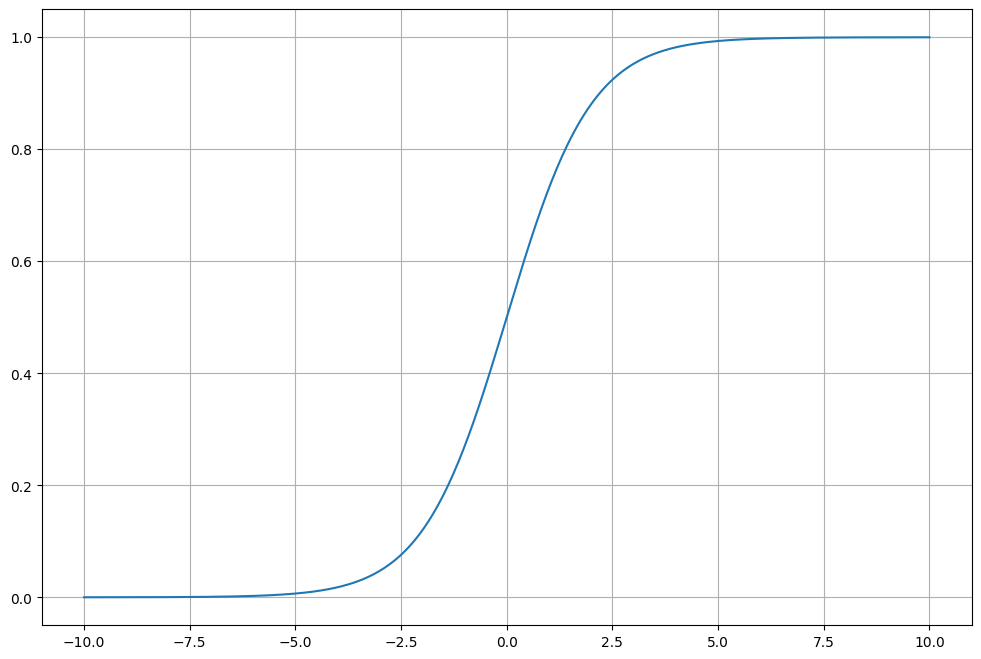

In [23]:
x = np.linspace(-10, 10, 500)

plt.figure(figsize=(12, 8))
plt.grid()
plt.plot(x, g(x))

Na regressão logística, a função $g(.)$ será utilizada para determinarmos os coeficientes $\beta$ de uma reta (em 2 dimensões) que será responsável por classificar os elementos de cada classe. Dessa forma temos:

\begin{equation}
\hat{y} = g(\mathbf{x}^T\pmb{\beta})) = \frac{1}{1 + \exp (-\mathbf{x}^T\pmb{\beta})}
\end{equation}

 A diferenciação da equação  $g(.)$ pode ser definida em termos dela própria. Para facilitar o entendimento vamos utilizar $\hat{y}$ para demonstrar:

\begin{equation}
    \label{eq:diff_sig}
    \frac{\partial \hat{y}}{\partial \pmb{\beta}} = \hat{y}(1 - \hat{y})
\end{equation}


Conforme encontrado em  *Bishop(2007)* uma das formas de obtermos os coeficientes $\pmb{\beta}$ é através da verossimilhança:

\begin{equation}
    p(\mathbf{y}|\pmb{\beta}) = \prod_{i = 1}^N \hat{y}_i^{y_i}(1-\hat{y}_i)^{1-y_i} 
\end{equation}
onde $\mathbf{y} = (y_1, y_2, ..., y_n, ..., y_N)^T$ e a função de erro pode ser definida pelo negativo do logaritmo da verossimilhança:

\begin{equation}
    \label{eq:error_veros}
    E(\pmb{\beta}) = -\ln p(\mathbf{y}|\pmb{\beta}) = - \sum_{i=1}^N y_i \ln \hat{y}_i + (1 - y_i) \ln(1 - \hat{y}_i)
\end{equation}

In [24]:
# negative logarithm of the likelihood
def log_likelihood(x, y, beta):
    y_hat = g(np.dot(beta, x.T))
    return -(np.dot(y, np.log(y_hat)) + np.dot((1 - y), np.log((1 - y_hat))))


Vamos pegar o gradiente da função de erro $E$ em relação a $\pmb{\beta}$: 

\begin{equation}
    \label{eq:grad_veros}
    \frac{\partial E}{\partial \pmb{\beta}} = - \sum_{i = 1}^N(\hat{y}_i - y_i)\mathbf{x}_i
\end{equation}


Gradiente da função de erro em forma matricial:

\begin{equation}
    \frac{\partial E}{\partial \pmb{\beta}} = - \mathbf{X}^T(\mathbf{\hat{y} - y }) 
\end{equation}

In [25]:
# error function gradient
def gradient_error_beta(x, y, beta):
    y_hat = g(np.dot(beta, x.T))
    return - np.dot((y - y_hat), x)

A regressão logística não possui uma solução fechada, mas podemos usar o Gradiente Descendente para encontrar os coeficientes $\pmb{\beta}$ que minimizam a função de erro. 

Para aplicar o Gradiente Descendente, precisamos definir um tamanho de passo $\alpha$, um limite de erro $\epsilon$ e um número máximo de iterações. O algoritmo é implementado da seguinte forma:

1. Inicialize os coeficientes $\pmb{\beta}$ com valores aleatórios.
2. Enquanto o erro for maior que $\epsilon$ e o número de iterações for menor que o máximo:
   - Calcule o gradiente da função de erro em relação a $\pmb{\beta}$.
   - Atualize os coeficientes usando a equação $\pmb{\beta} \leftarrow \pmb{\beta} - \alpha \frac{\partial E}{\partial \pmb{\beta}}$.
3. Retorne os coeficientes $\pmb{\beta}$ atualizados.

Ao final da execução, os coeficientes $\pmb{\beta}$ estarão atualizados e podemos utilizar a superfície de decisão para classificar novos dados.

In [26]:
def logistic_regression(x, y, alpha=0.01, epsilon=1e-5, max_iter=10000):
    """
    Train a logistic regression model using gradient descent.
    :param x: Input data matrix of shape (n, d).
    :param y: Target variable vector.
    :param alpha: Learning rate.
    :param epsilon: Convergence threshold.
    :param max_iter: Maximum number of iterations.
    :return: Vector of coefficients beta.
    """
    n, d = x.shape
    beta = np.random.uniform(-1.0, 1.0, d)
    iter_count = 0
    prev_err = log_likelihood(x, y, beta)
    while (prev_err > epsilon and iter_count < max_iter):
        grad_err = gradient_error_beta(x, y, beta)
        beta -= alpha * grad_err
        curr_err = log_likelihood(x, y, beta)
        if abs(prev_err - curr_err) < epsilon:
            break
        prev_err = curr_err
        iter_count += 1
    return beta

#### Exemplo 1 - Blobs

Aplicação da regressão logística em dados artificiais através da rotina **make_blobs()**

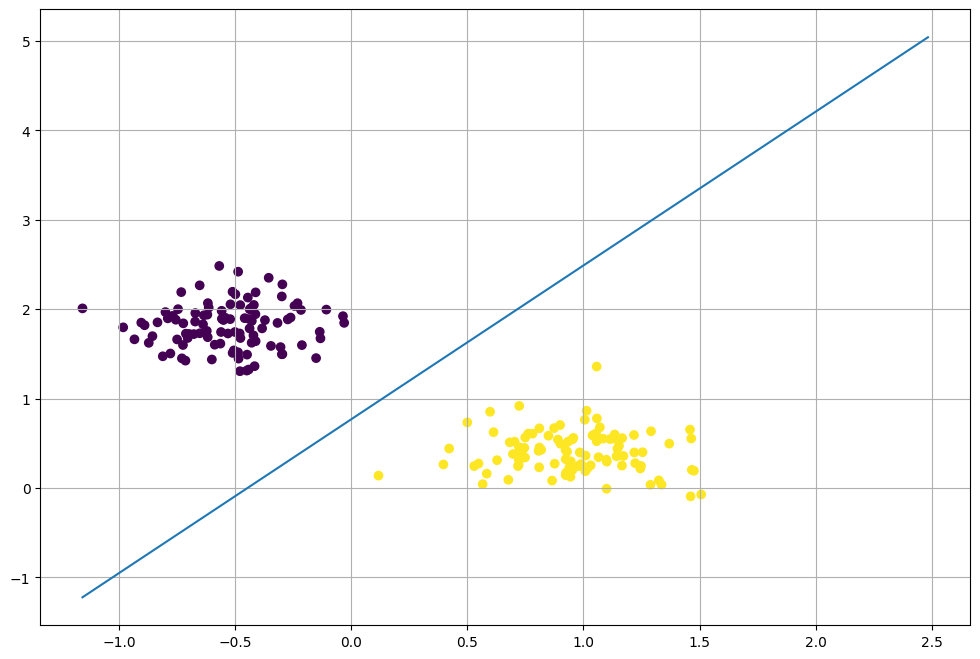

In [27]:
# Now we will use our logistic function on artificially generated data
xb, yb = make_blobs(n_samples=200, 
                    centers=2, 
                    n_features=2,
                    cluster_std=.25, 
                    center_box=(-2, 2),
                    random_state=42)

# Adding the bias term
Xb = np.c_[np.ones(200), xb]

# Generating the coefficients using logistic regression
beta = logistic_regression(Xb, yb)

# Plotting the decision boundary created from logistic regression
plt.figure(figsize=(12,8))

# Defining the line that separates the classes using the coefficients obtained from logistic regression
x_beta = np.linspace(np.amin(xb), np.amax(xb), 200)
y_beta = -beta[0] / beta[2] - beta[1]/beta[2] * x_beta

# Plotting the input data and decision boundary
plt.scatter(xb[:, 0], xb[:, 1], c=yb)
plt.plot(x_beta, y_beta)
plt.grid()

#### Exemplo 2 - Moons

Aplicação da regressão logística em dados artificiais através da rotina **make_moons()**

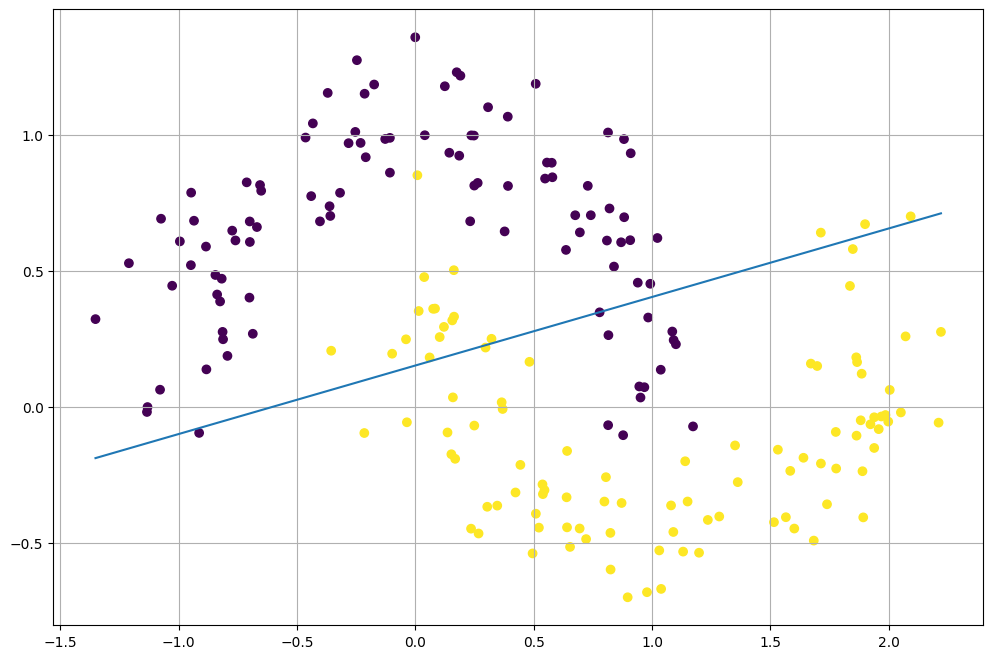

In [28]:
# Generate moon-shaped data with noise
X_moons, y_moons = make_moons(n_samples=200, noise=.15, random_state=42)

# Add bias column to the feature matrix
X_moons = np.c_[np.ones(200), X_moons]

# Train logistic regression model and get coefficients
beta_moons = logistic_regression(X_moons, y_moons)

# Compute line that separates the two classes based on the coefficients
x_line = np.linspace(np.amin(X_moons[:, 1]), np.amax(X_moons[:, 1]), 200)
y_line = -beta_moons[0] / beta_moons[2] - beta_moons[1] / beta_moons[2] * x_line

# Plot the data points and decision boundary
plt.figure(figsize=(12, 8))
plt.scatter(X_moons[:, 1], X_moons[:, 2], c=y_moons)
plt.plot(x_line, y_line)
plt.grid()

### Questões e resoluções do problema 2

Agora que você tem mais conhecimento sobre regressão logística, as seguintes tarefas devem ser realizadas:

- a) Determine uma métrica para comparar os Exemplos 1 (Blobs) e 2 (Moons) do problema 2. Qual dos dois exemplos a regressão logística apresentou melhor desempenho?

Como o problema apresenta classes balanceadas (mesmo número de amostras para as duas classes), a **acurácia**, isto é, a proporção entre o número de amostras classificadas corretamente e o número total de amostras, é uma métrica eficaz na avaliação dos modelos.

Para tal, vou obter a classificação (0 ou 1) retornada pelos modelos de regressão logística para cada um dos problemas e comparar com o vetor de labels inicial.

In [29]:
# A saída do modelo de regressão logística é obtida da mesma forma que o Perceptron Simples (aplica a função de ativação
# sigmoidal na multiplicação do X pelo W)
yhatBlobs = np.array([round(classif) for classif in g(np.matmul(Xb, beta))])
yhatMoons = np.array([round(classif) for classif in g(np.matmul(X_moons, beta_moons))])

# Função para cálculo da acurácia
def accuracy(y, yhat):
    totalSamples = yhat.shape[0]
    correctSamples = np.sum(1.0*(y==yhat))
    return(round(correctSamples/totalSamples,2))

# Avaliação dos modelos
blobsAccuracy = accuracy(yb, yhatBlobs)
moonsAccuracy = accuracy(y_moons, yhatMoons)

# Print dos resultados
print(f'''Para o dataset Blobs, o modelo de regressão logística obteve acurácia de {100*blobsAccuracy}%.
Para o dataset Moons, o modelo de regressão logística teve acurácia de {100*moonsAccuracy}%.''')
    

Para o dataset Blobs, o modelo de regressão logística obteve acurácia de 100.0%.
Para o dataset Moons, o modelo de regressão logística teve acurácia de 84.0%.


Observa-se que a regressão logística apresentou melhores resultados para o problema Blobs, dado que ele é **linearmente separável** e essa técnica de modelagem é adequada para esse tipo de problema. Para o dataset Moons, por outro lado, o modelo apresentou um desempenho consideravelmente pior, dado que o problema apresenta não-linearidades que a regressão logística não é capaz de tratar.

- b) Utilize a **Programação Genética** para melhorar o desempenho da classificação que obteve o pior resultado. Utilize a métrica escolhida na etapa anterior para comparar a nova classificação gerada pela **Programação Genética** com as classificações anteriores.

Vou utilizar uma rotina diferente de programação genética para resolver essa questão. Dessa vez, utilizarei o pacote **SymbolicClassifier**, que implementa funções de custo mais adequadas ao problema de classificação e aplica a função sigmoidal na saída do modelo, de forma que a separação possa ser realizada.

In [30]:
# Geração dos dados para treinamento do algoritmo
#
# Nota-se: a função SymbolicRegressor() espera que x seja uma matriz, então, mesmo que seja um problema
# univariado, passa-se uma matriz coluna (x.reshape((-1,1))). y não precisa ser matriz, pode ser vetor.
xQ2B = X_moons[:,1:]
yQ2B = y_moons

# Funções complementares
sigmoid = make_function(function=g, name='sigmoid', arity=1)

# Definição dos hiperparâmetros do modelo
#
# As funções escolhidas para o function_set são escolhidas a partir da "aparência" da distribuição dos dados
modelQ2B = SymbolicClassifier(population_size=100,
                                  generations=300,
                                  function_set=['add', 'sub', 'tan', 'cos', exp, 'log'], 
                                  stopping_criteria=0.09,
                                  p_crossover=0.4, 
                                  p_subtree_mutation=0.2,
                                  p_hoist_mutation=0.2, 
                                  p_point_mutation=0.2,
                                  max_samples=0.9, 
                                  verbose=1,
                                  parsimony_coefficient=0.01,
                                  random_state=0)


# É basicamente um problema de aprendizado supervisionado, então passa-se uma grade de pontos e a saída esperada.
modelQ2B.fit(xQ2B, yQ2B)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     9.36          1.25605       24         0.443639          0.59917     25.20s
   1     6.86         0.820239        8         0.451067         0.319812     28.23s
   2     5.31         0.743899        8          0.43074         0.502759     29.87s
   3     6.18         0.752372        6         0.364534         0.585547     24.10s
   4     5.37         0.664497       10         0.338531         0.270875     22.95s
   5     6.63          0.59179       10         0.334243          0.30946     27.40s
   6     6.89         0.609742       10         0.322452         0.415586     25.69s
   7     7.07         0.517196       10         0.317926          0.45632     23.73s
   8     9.93         0.504311       16         0.302151         0.660357  

SymbolicClassifier(function_set=['add', 'sub', 'tan', 'cos',
                                 <gplearn.functions._Function object at 0x7fa39de6e670>,
                                 'log'],
                   generations=300, max_samples=0.9, p_crossover=0.4,
                   p_hoist_mutation=0.2, p_point_mutation=0.2,
                   p_subtree_mutation=0.2, parsimony_coefficient=0.01,
                   population_size=100, random_state=0, stopping_criteria=0.09,
                   verbose=1)

In [31]:
# Obtém expressão retornada pelo PG
bestExprQ2B = str(modelQ2B._program)

# Transforma saída do PG em expressão simbólica
symbolicBestExpressionQ2B = sp.simplify(sp.sympify(bestExprQ2B, locals=locals))

# Expressão simbólica do modelo após passar por sigmoide
1/(1+sp.exp(-symbolicBestExpressionQ2B))

1/(exp(-2*X0 - 5*cos(exp(X1)))/log(X0)**2 + 1)

In [32]:
# Obtenção da previsão do modelo pros dados de teste
predictQ2B = modelQ2B.predict(xQ2B)

# Avaliação do modelo
modelAccuracy = accuracy(y_moons, predictQ2B)

# Print dos resultados
print(f'''Para o modelo de regressão logística, a acurácia foi {100*moonsAccuracy}%.
Para o modelo de programação genética, a acurácia foi {100*modelAccuracy}%.''')

Para o modelo de regressão logística, a acurácia foi 84.0%.
Para o modelo de programação genética, a acurácia foi 96.0%.


Observa-se um aumento muito considerável na acurácia do modelo utilizando a expressão retornada pela programação genética.

- c) Assim como a superfície de decisão gerada pela regressão logística, apresente a curva que representa o modelo e a superfície de decisão criada  pela **Programação Genética**.

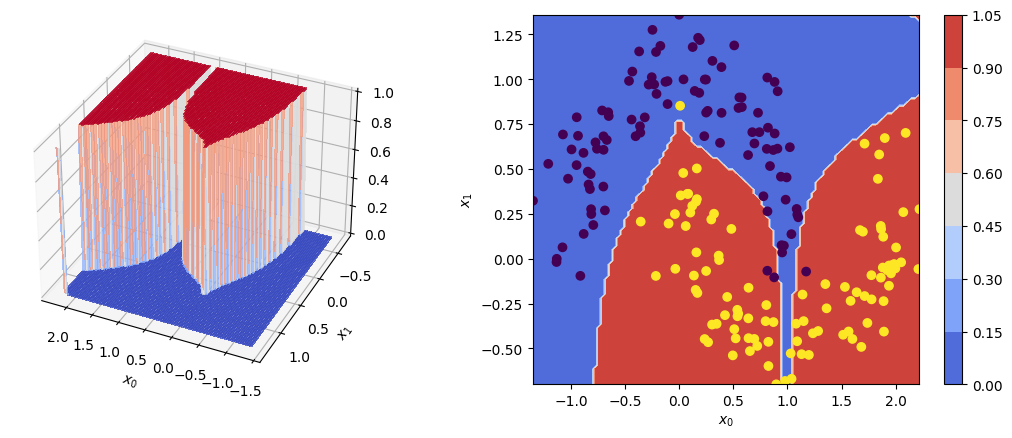

In [33]:
# Obtém expressão retornada pelo PG
bestExprQ2B = str(modelQ2B._program)

# Obtenção da previsão do modelo pros dados de teste
x0Q2B = np.linspace(np.amin(X_moons[:, 1]), np.amax(X_moons[:, 1]), 100)
x1Q2B = np.linspace(np.amin(X_moons[:, 2]), np.amax(X_moons[:, 2]), 100)
X0Q2B, X1Q2B = np.meshgrid(x0Q2B, x1Q2B)
xTestQ2B = np.column_stack((X0Q2B.ravel(), X1Q2B.ravel()))
predictQ2B = modelQ2B.predict(xTestQ2B)

# Adequação da previsão para o formato das entradas
outQ2B = predictQ2B.reshape(X0Q2B.shape)

fig = plt.figure(figsize=plt.figaspect(.35))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot_surface(X0Q2B, X1Q2B, outQ2B, rstride=1, cstride=1, cmap='coolwarm', linewidth=0, antialiased=False, alpha=0.75)
ax1.view_init(elev=33, azim=115)
contQ2B = ax2.contourf(X0Q2B, X1Q2B, outQ2B, cmap='coolwarm')
fig.colorbar(contQ2B)
ax2.scatter(X_moons[:, 1], X_moons[:, 2], c=y_moons)
ax1.set_xlabel('$x_0$')
ax1.set_ylabel('$x_1$')
ax2.set_xlabel('$x_0$')
ax2.set_ylabel('$x_1$')

plt.show()